**Diabetes: EDA, testes de hipóteses, previsões com Python**

Este projeto se concentra na análise de dados médicos sobre diabetes e na construção de modelos preditivos para prever o status do diabetes. Inclui análise exploratória de dados (EDA), testes de hipóteses, observações e o desenvolvimento de vários modelos para prever a presença ou ausência de diabetes.

O conjunto de dados tem originalmente **330 recursos (colunas)**, mas com base em pesquisas sobre doenças do diabetes em relação aos fatores que influenciam a doença do diabetes e outras condições crônicas de saúde, o editor desse conjunto de dados limpa os dados do **BRFSS** em um **formato utilizável para algoritmos de aprendizado de máquina**.

---------------------------------------------------------------

**Fatores de risco importantes para diabetes:**

(pressão arterial (alta), colesterol (alto), tabagismo, diabetes, obesidade, idade, sexo, raça, dieta, exercício, consumo de álcool, IMC, renda familiar, estado civil, sono, tempo desde o último check-up, educação, cuidados de saúde cobertura, Saúde Mental)

--------------------------------------------------------------

### Sobre as colunas:

**Diabetes_binary**: você tem diabetes (0,1)

**HighBP**: Adultos que foram informados de que têm pressão alta por um médico, enfermeiro ou outro profissional de saúde (0,1)

**HighChol**: Algum médico, enfermeiro ou outro profissional de saúde já lhe disse que seu colesterol no sangue está alto? (0,1)

**CholCheck**: verificação de colesterol nos últimos cinco anos (0,1)

**BMI**: Índice de Massa Corporal (IMC)

**Smoker**: Você fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros] (0,1)

**Stroke**: (Já disse) que você teve um AVC. (0,1)

**HeartDiseaseorAttack**: entrevistados que já relataram ter doença coronariana (DCC) ou infarto do miocárdio (IM) (0,1)

**PhysActivity**: Adultos que relataram ter praticado atividade física ou exercício físico durante os últimos 30 dias, fora do trabalho regular (0,1)

**Fruits**: Consumir frutas 1 ou mais vezes por dia (0,1)

**Veggies**: Consumir Legumes 1 ou mais vezes por dia (0,1)

**HvyAlcoholConsump**: Bebedores pesados ​​(homens adultos que tomam mais de 14 doses por semana e mulheres adultas que tomam mais de 7 doses por semana)(0,1)

**AnyHealthcare**: você tem algum tipo de cobertura de saúde, incluindo seguro saúde, planos pré-pagos, como HMOs, ou planos governamentais, como Medicare ou Indian Health Service? (0,1)

**NoDocbcCost**: Houve algum momento nos últimos 12 meses em que você precisou consultar um médico, mas não pôde por causa do custo? (0,1)

**GenHlth**: Você diria que em geral sua saúde é: taxa (1 ~ 5)

**MentHlth**: Agora, pensando em sua saúde mental, que inclui estresse, depressão e problemas emocionais, por quantos dias durante os últimos 30 dias sua saúde mental não foi boa? (0~30)

**FisHlth** : Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias durante os últimos 30 dias sua saúde física não foi boa? (0~30)

**DiffWalk**: Você tem muita dificuldade para caminhar ou subir escadas? (0,1)

**Sex**: Indique o sexo do entrevistado (0,1) (Feminino ou Masculino)

**Age**: Categoria de idade de quatorze níveis (1 a 14)

**Education**: Qual é a série ou ano escolar mais alto que você concluiu? (1 ~ 6)

**Income** : É a sua renda familiar anual proveniente de todas as fontes: (Se o entrevistado recusar em qualquer nível de renda, codifique "Recusou.") (1 ~ 8)

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=6ca0c1318c5a45f56a4e873e2026de838b9929bbccfa2566a26c0f4d3f8335ec
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

# 1: Importar bibliotecas

Esta seção é responsável por importar as bibliotecas necessárias para o projeto, incluindo bibliotecas para manipulação de dados (Pandas e NumPy), visualização (Seaborn e Matplotlib), modelagem (Scikit-Learn), e algumas outras bibliotecas específicas para estatísticas e análise de dados.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
from ydata_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 2: Data Exploring

Nesta seção, os dados são carregados a partir de um arquivo CSV. Neste casso o CSV traz informações sobre indicadores de saúde relacionados à diabetes.

In [ ]:
Orginal_data = pd.read_csv("/content/drive/MyDrive/G.S. AI E CHATBOT/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')
data = pd.read_csv("/content/drive/MyDrive/G.S. AI E CHATBOT/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

# 3: Dataset Report

Aqui, um relatório sobre o conjunto de dados é gerado usando a biblioteca pandas-profiling (ProfileReport). Em seguida, algumas informações básicas sobre o conjunto de dados são exibidas, como seu formato, informações e as primeiras linhas.


In [ ]:
profile = ProfileReport(data)


In [ ]:
profile


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#4: Preprocessamento

Nesta seção, as colunas do conjunto de dados são convertidas para o tipo de dados inteiro. Isso é feito para garantir que todas as colunas tenham o mesmo tipo de dados.

In [ ]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

# 5: Verificação de Nulos e Únicos

Verifica se há valores nulos no conjunto de dados e conta o número de valores únicos em cada coluna.

In [ ]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


#6: Funções para Visualização

Uma função é definida para exibir contagens de valores para todo o conjunto de dados.


In [ ]:
#Função para visualizar a contagem de valores para todos os dados
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [ ]:
v_counts(data)

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0.0    243388
1.0     10292
Name: Stroke, dtype: int6

# 7: Verificação de Outliers

Verifica outliers em algumas colunas selecionadas usando gráficos de caixa.

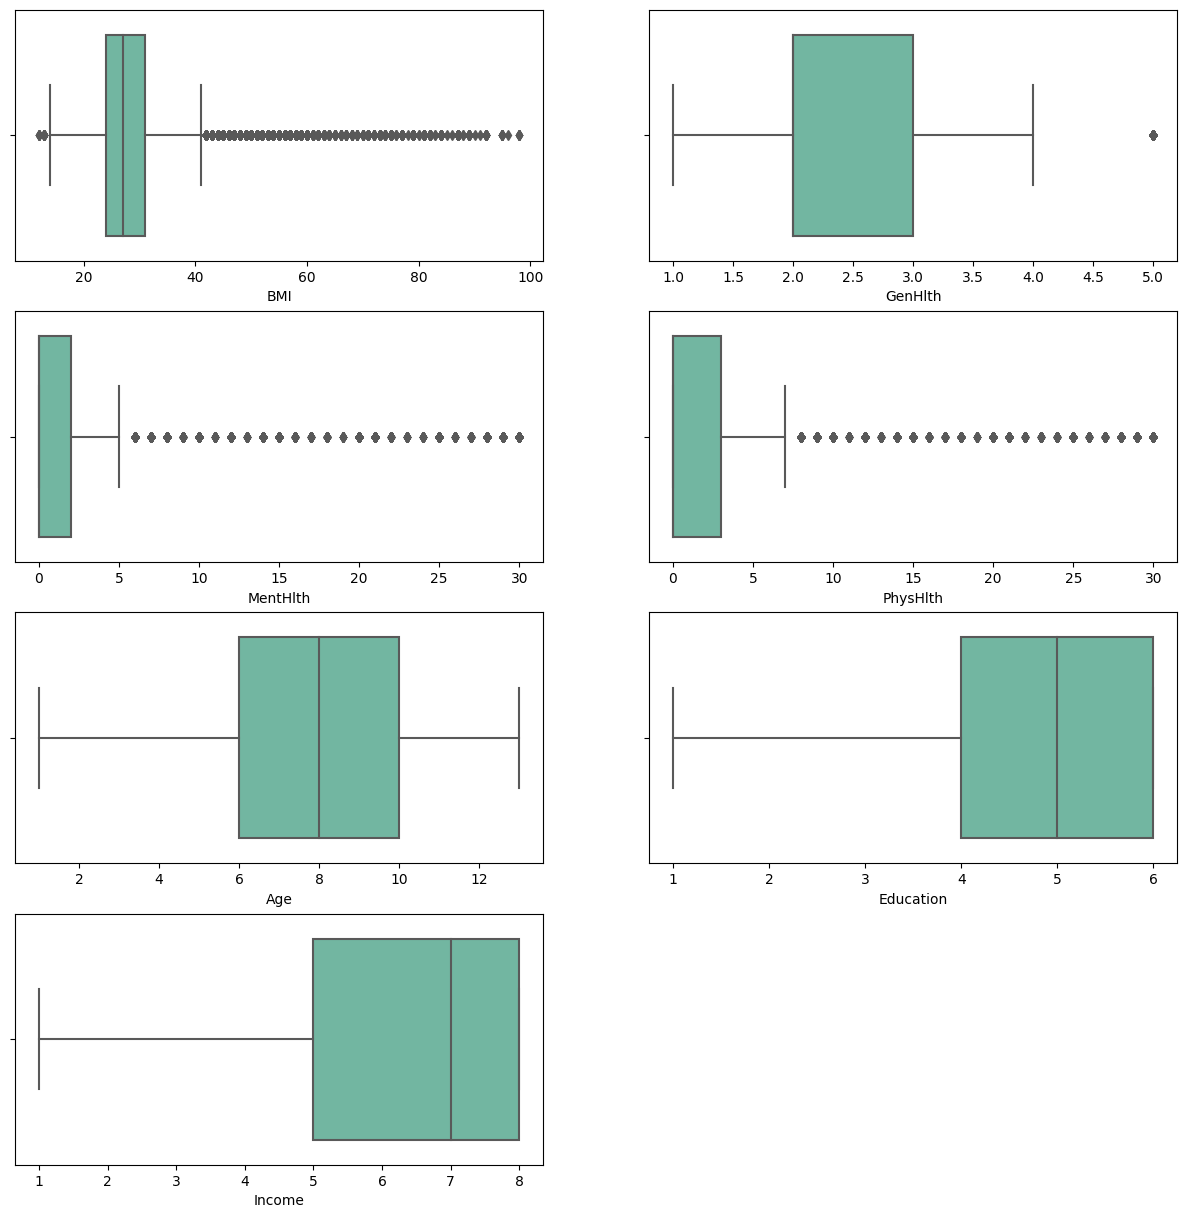

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

# 8: Remoção de Duplicatas
Verifica e remove duplicatas no conjunto de dados.


In [ ]:
data.duplicated().sum()

24206

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(229474, 22)

# 9: Criação de Categorias

Cria colunas categóricas adicionais para melhorar a interpretação dos dados.

In [ ]:
#Substituindo 0 por Não Diabético e 1 por Diabético
#adicionando uma nova coluna Diabetes_binary_str

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [ ]:
#ajuda-nos a exibir a variável categórica
data2 = data.copy()

In [ ]:

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

# 10: Análise Exploratória de Dados (EDA)
Realiza uma análise exploratória de dados, incluindo um mapa de calor para visualizar a correlação entre as características e histogramas para visualizar as distribuições.

Text(0.5, 1.0, 'correlation of feature')

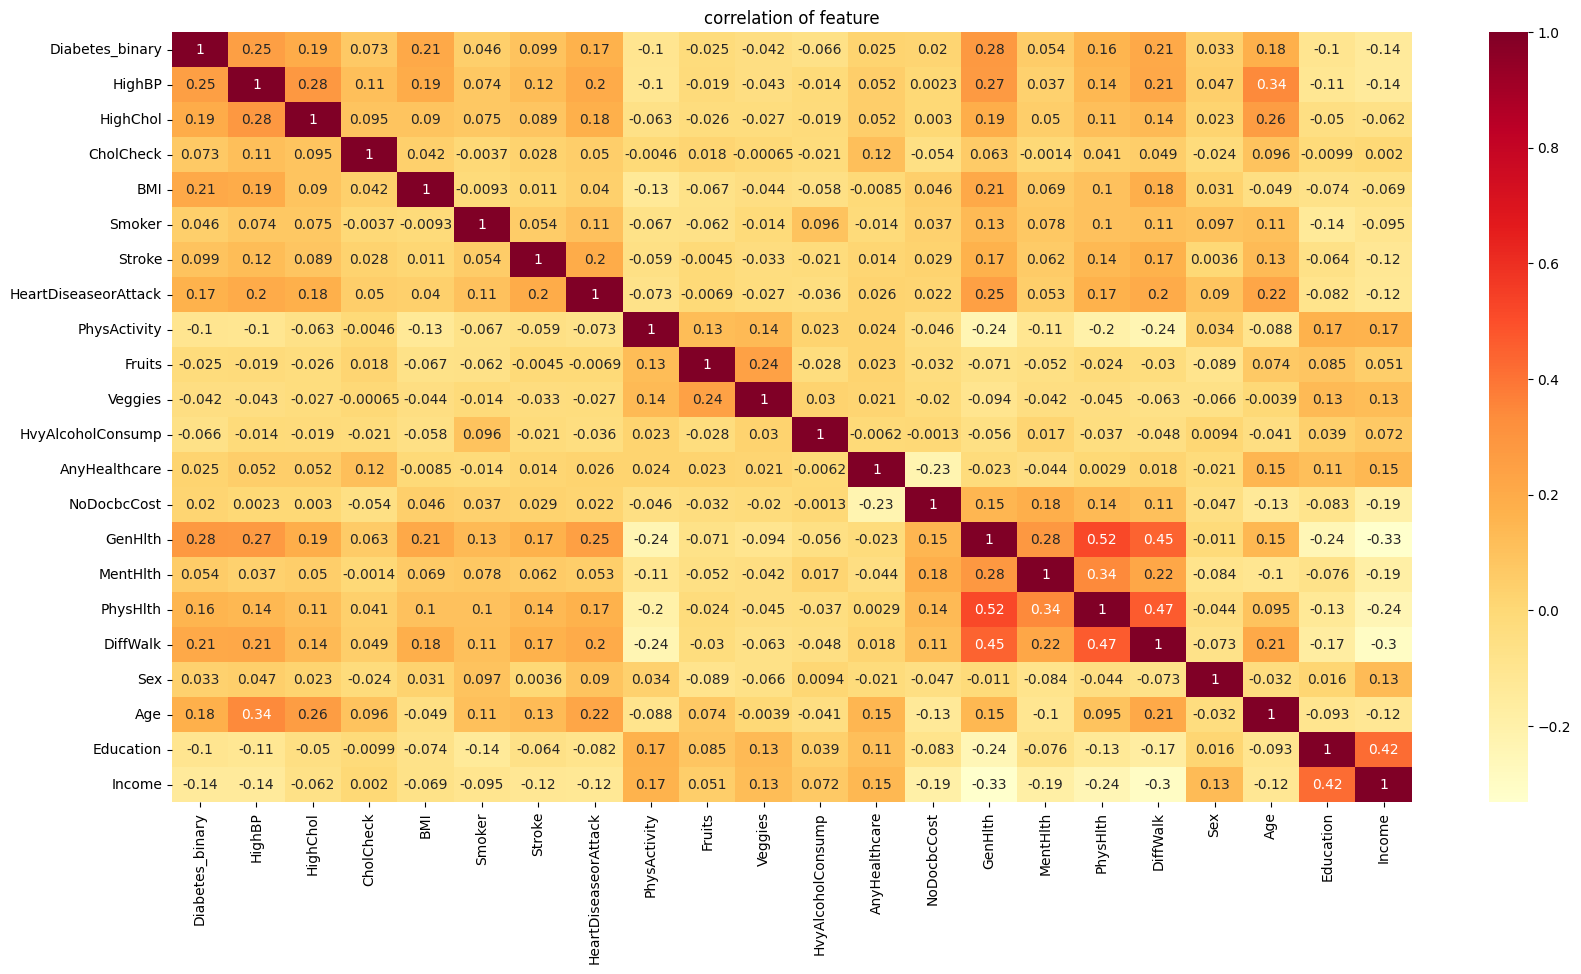

In [ ]:
#Utilizando um mapa de calor para compreender melhor a correlação no conjunto de dados.
#Mapa de calor da correlação.
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

# 11: Visualização de Colunas e sua Relação com o Alvo
Cria gráficos para visualizar a relação entre certas colunas e o alvo.


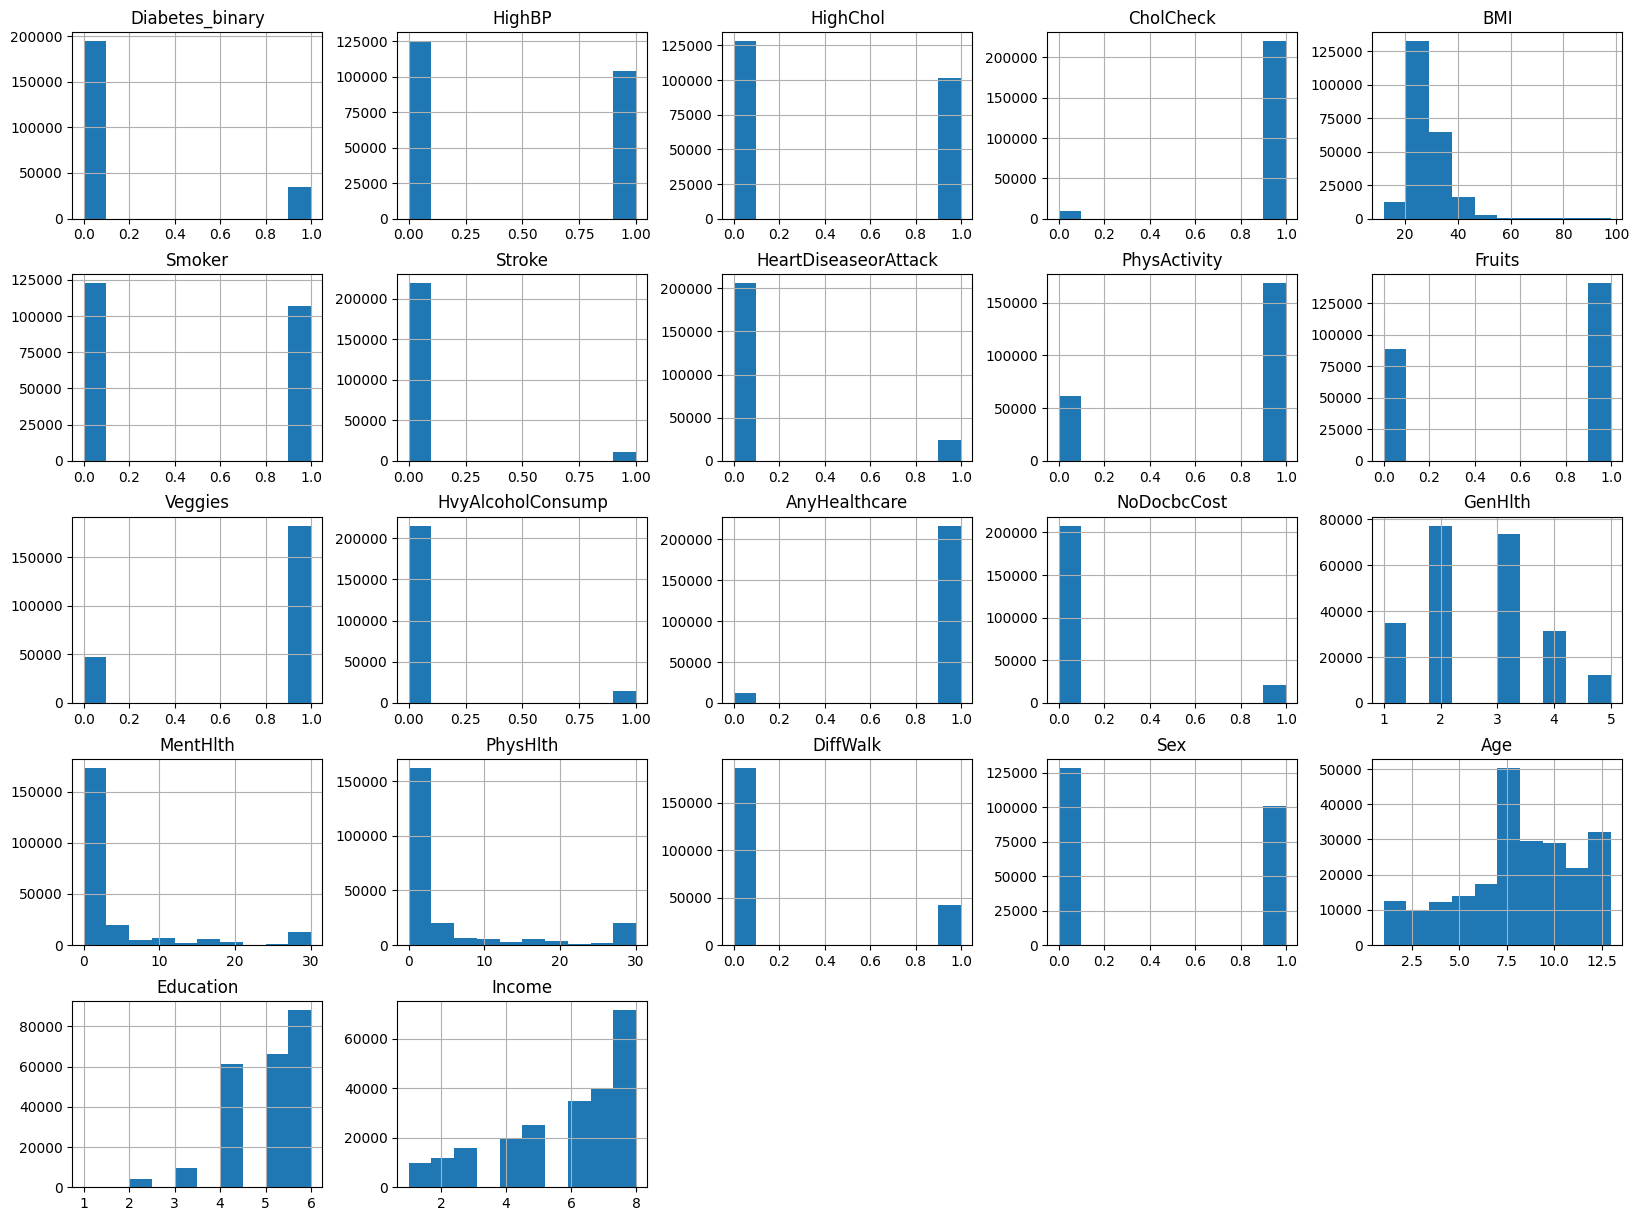

In [ ]:
#Utilizando um histograma para compreender melhor os dados do conjunto de dados.
data.hist(figsize=(20,15));

In [ ]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [ ]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

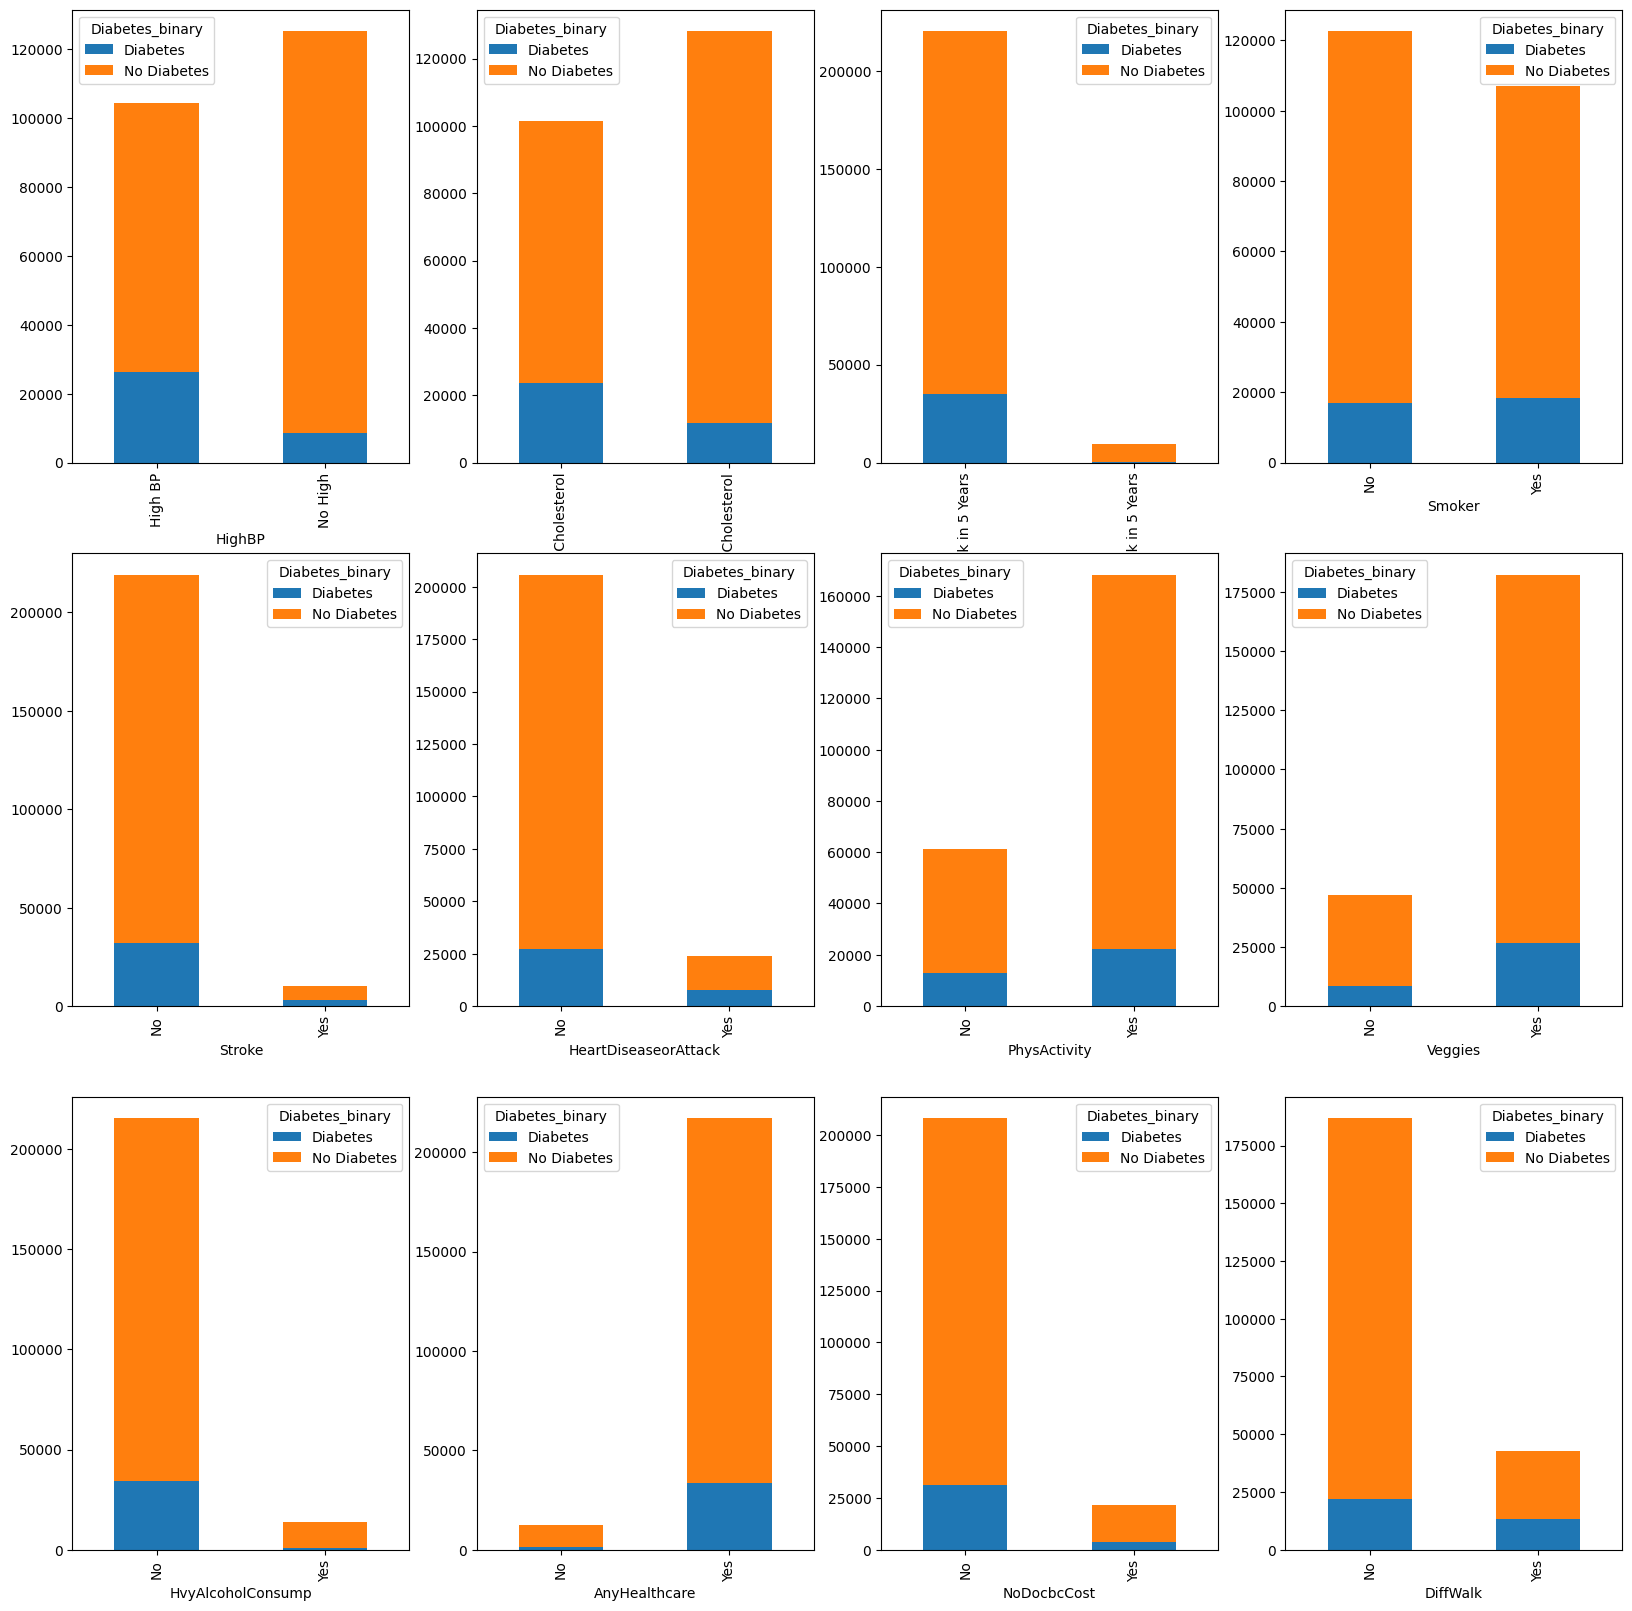

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

# 12: Análise de Estatísticas Descritivas do Alvo
Exibe estatísticas descritivas do alvo (variável que estamos tentando prever) e visualiza a distribuição por meio de gráficos de barras e um gráfico de pizza.

In [ ]:
# Média da coluna Diabetes_binary
# 0 para pessoa não diabética e 1 para pessoa diabética

data2["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

# 13: Análise de Variáveis Relacionadas ao Alvo
Analisa a relação entre variáveis específicas e o alvo.


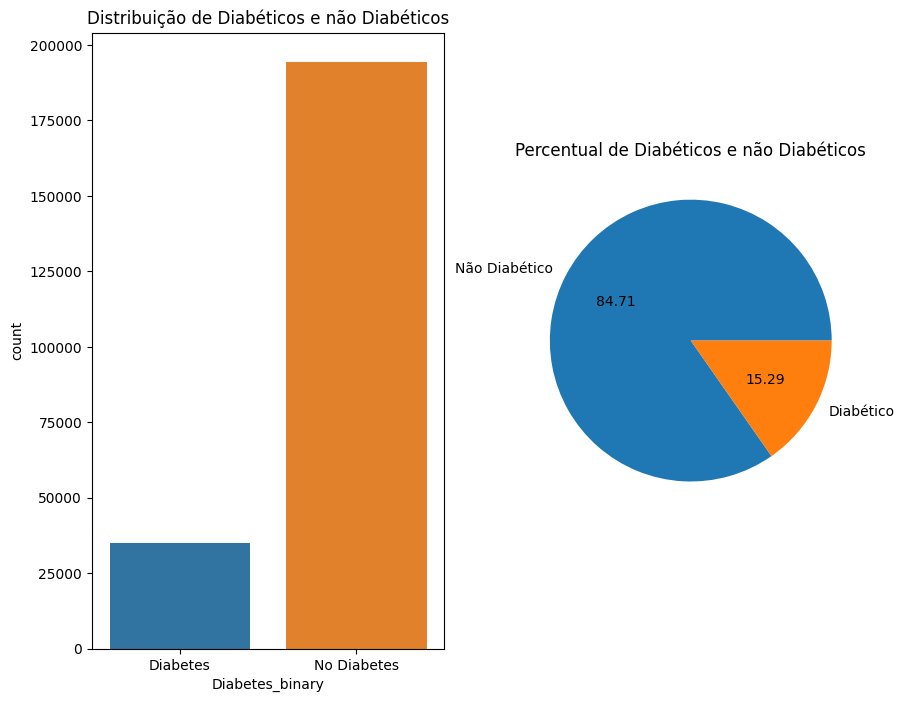

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a contagem de valores de 'Diabetes_binary' usando countplot
figura1, grafico1 = plt.subplots(1, 2, figsize=(10, 8))

# Garanta que 'Diabetes_binary' seja uma variável categórica
data2['Diabetes_binary'] = data2['Diabetes_binary'].astype('category')

# Use countplot para dados categóricos
sns.countplot(x='Diabetes_binary', data=data2, ax=grafico1[0])
grafico1[0].set_title('Distribuição de Diabéticos e não Diabéticos')

# Verificando a média de pessoas diabéticas e não diabéticas por meio de um gráfico de pizza
labels = ["Não Diabético", "Diabético"]

# Use value_counts diretamente na coluna categórica
contagem_diabetes = data2['Diabetes_binary'].value_counts()

plt.pie(contagem_diabetes, labels=labels, autopct='%.02f')
plt.title('Percentual de Diabéticos e não Diabéticos')
plt.show()


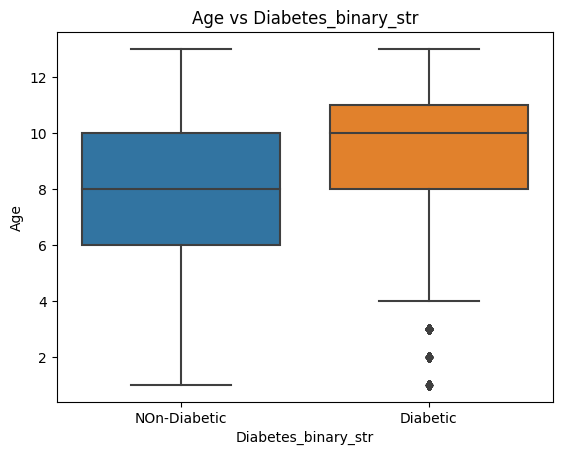

In [ ]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

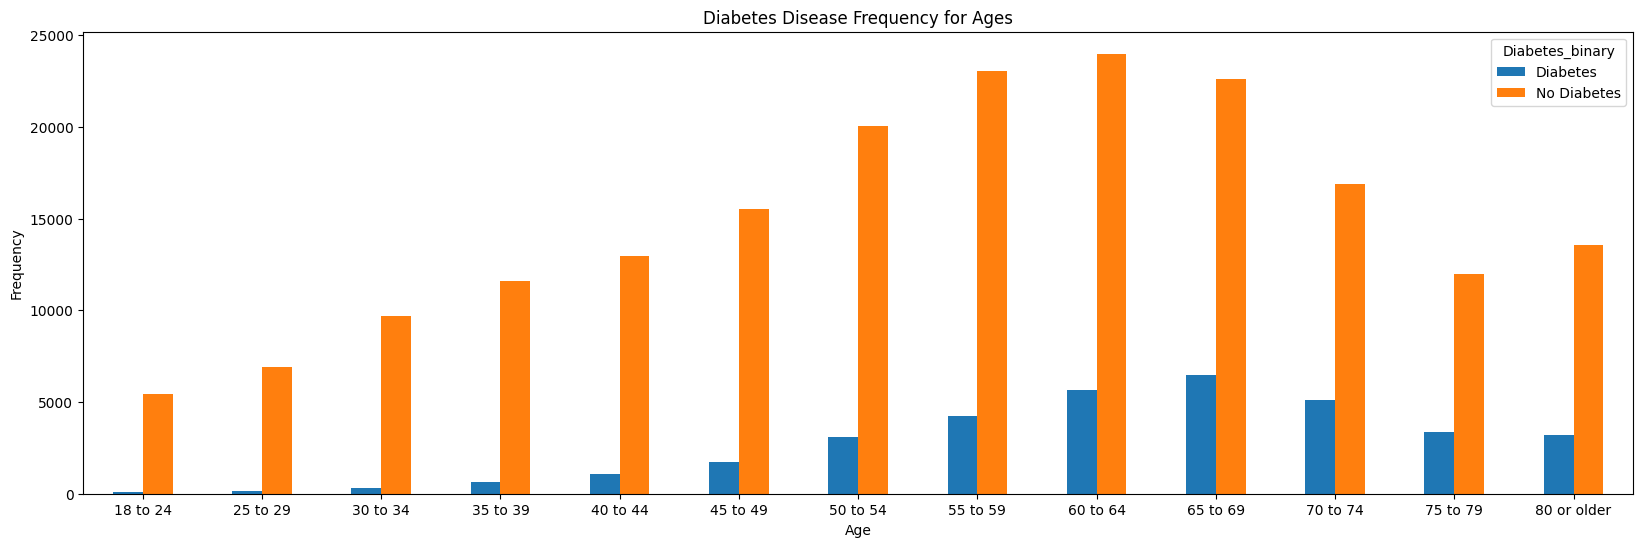

In [ ]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


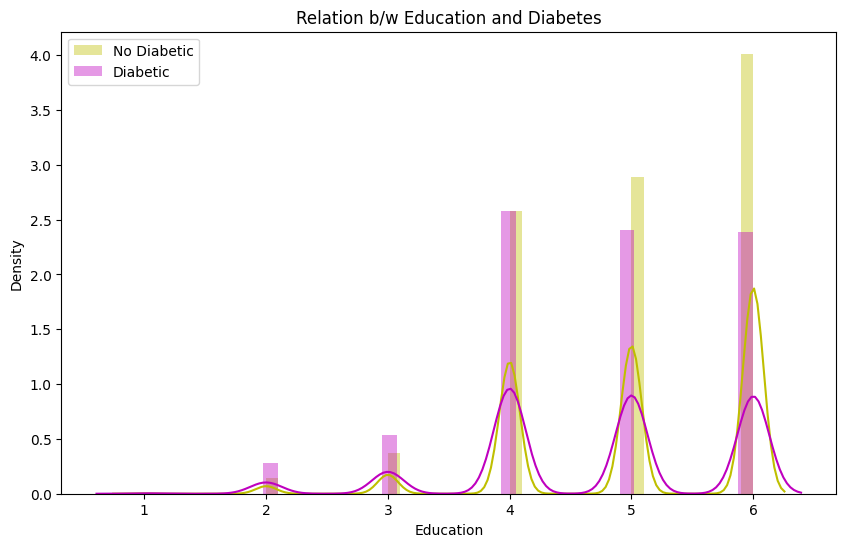

In [ ]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

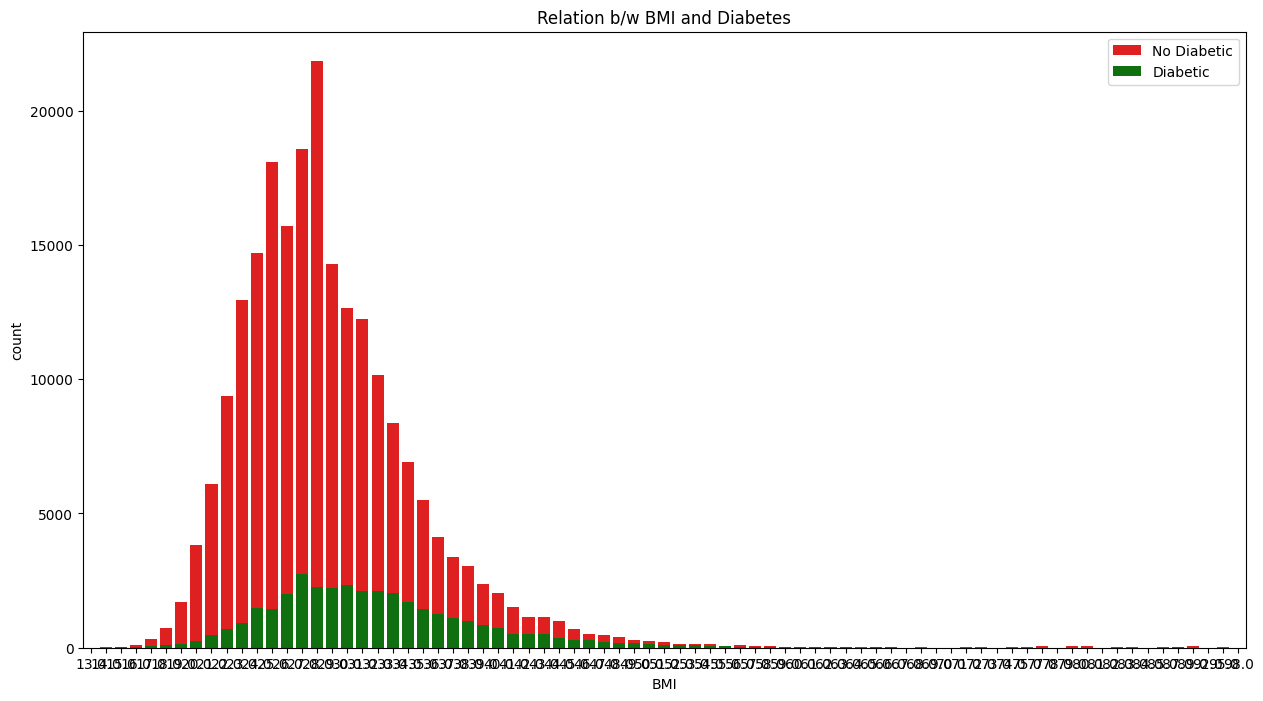

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Utilize o mesmo eixo x para ambos os grupos.
sns.countplot(x='BMI', data=data[data.Diabetes_binary == 0], color="r", label="No Diabetic")
sns.countplot(x='BMI', data=data[data.Diabetes_binary == 1], color="g", label="Diabetic")

plt.title("Relation b/w BMI and Diabetes")
plt.legend()
plt.show()


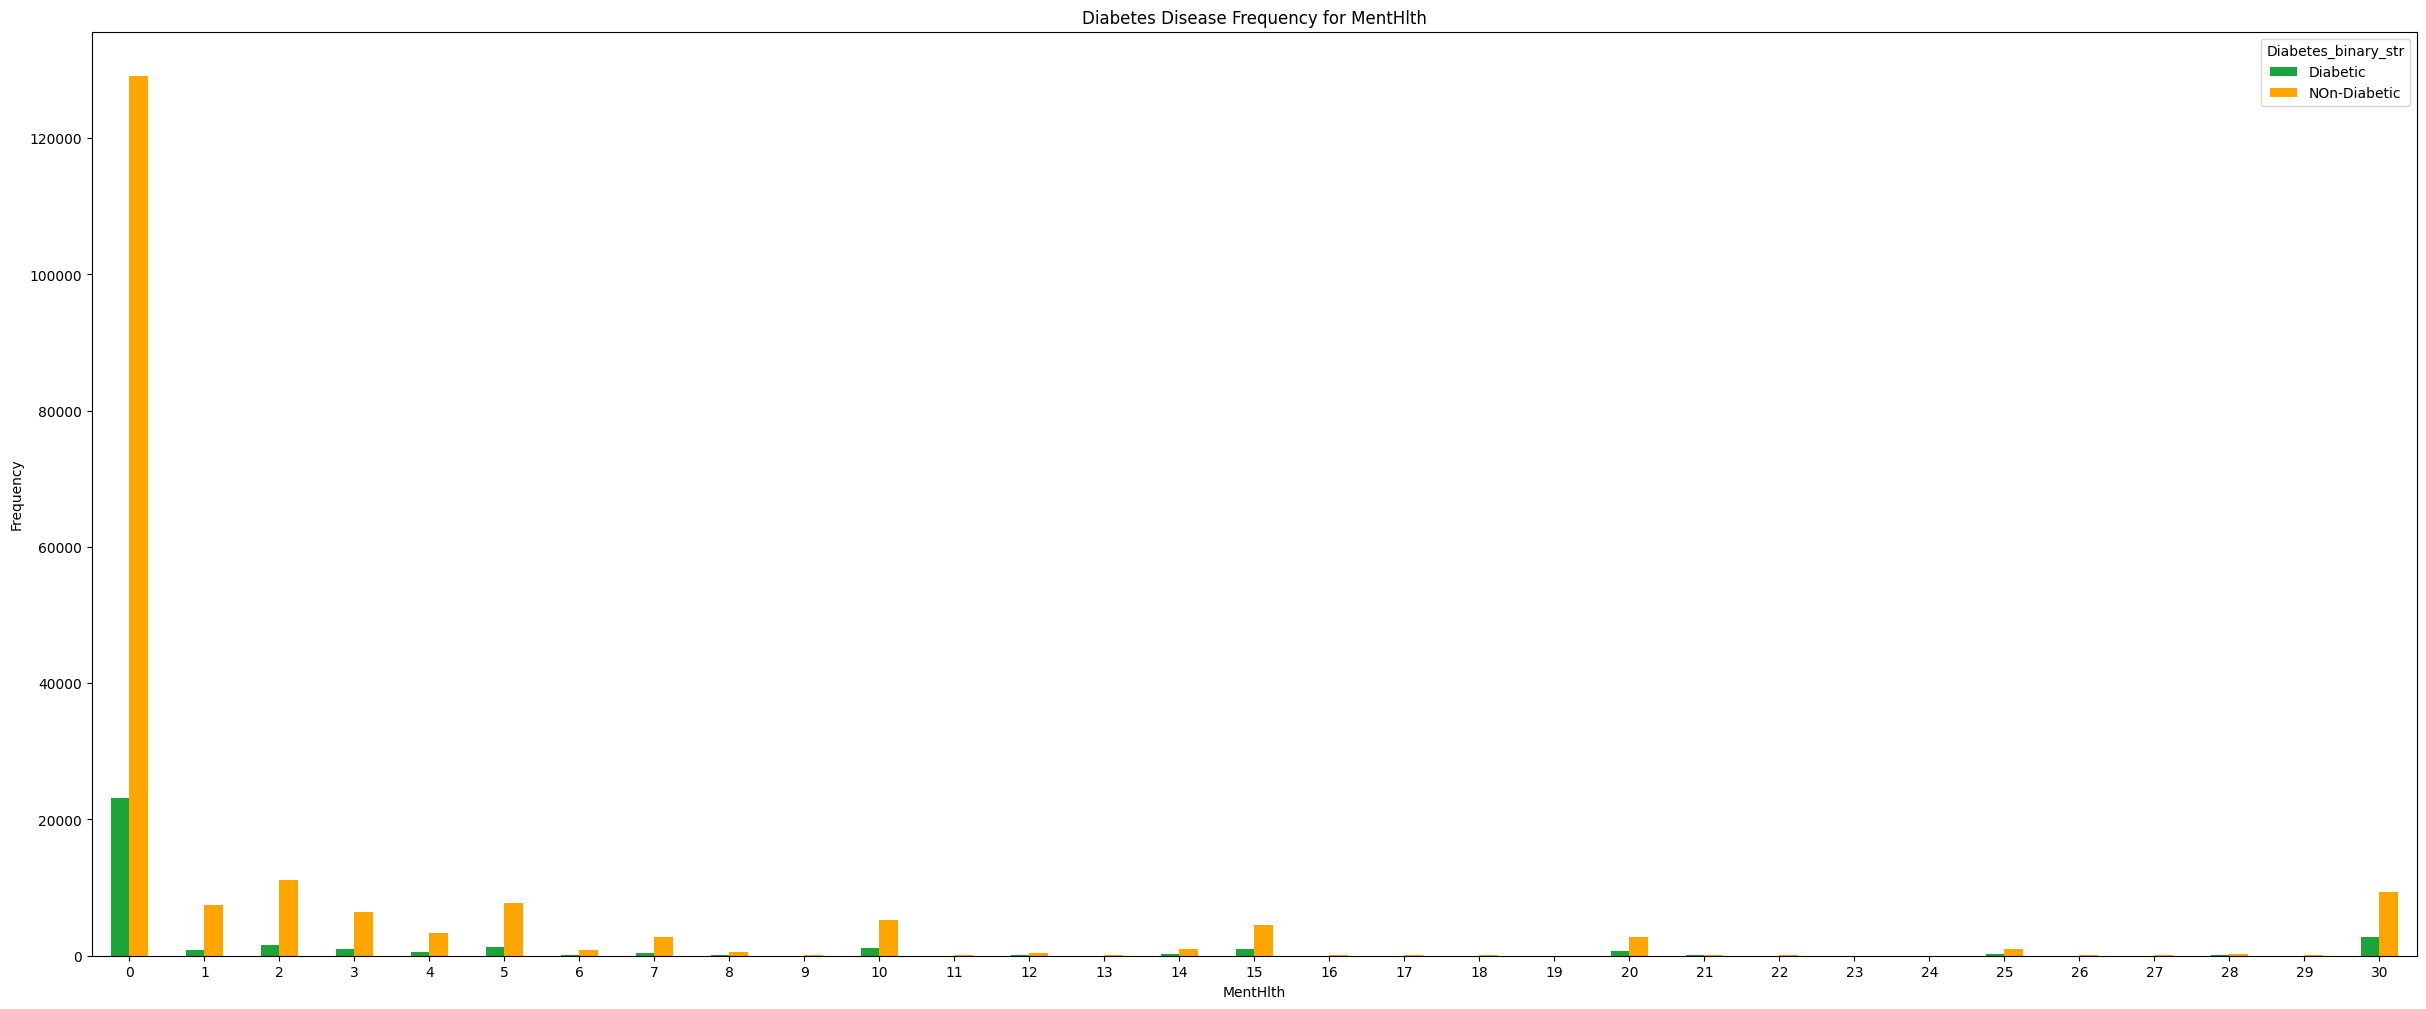

In [ ]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

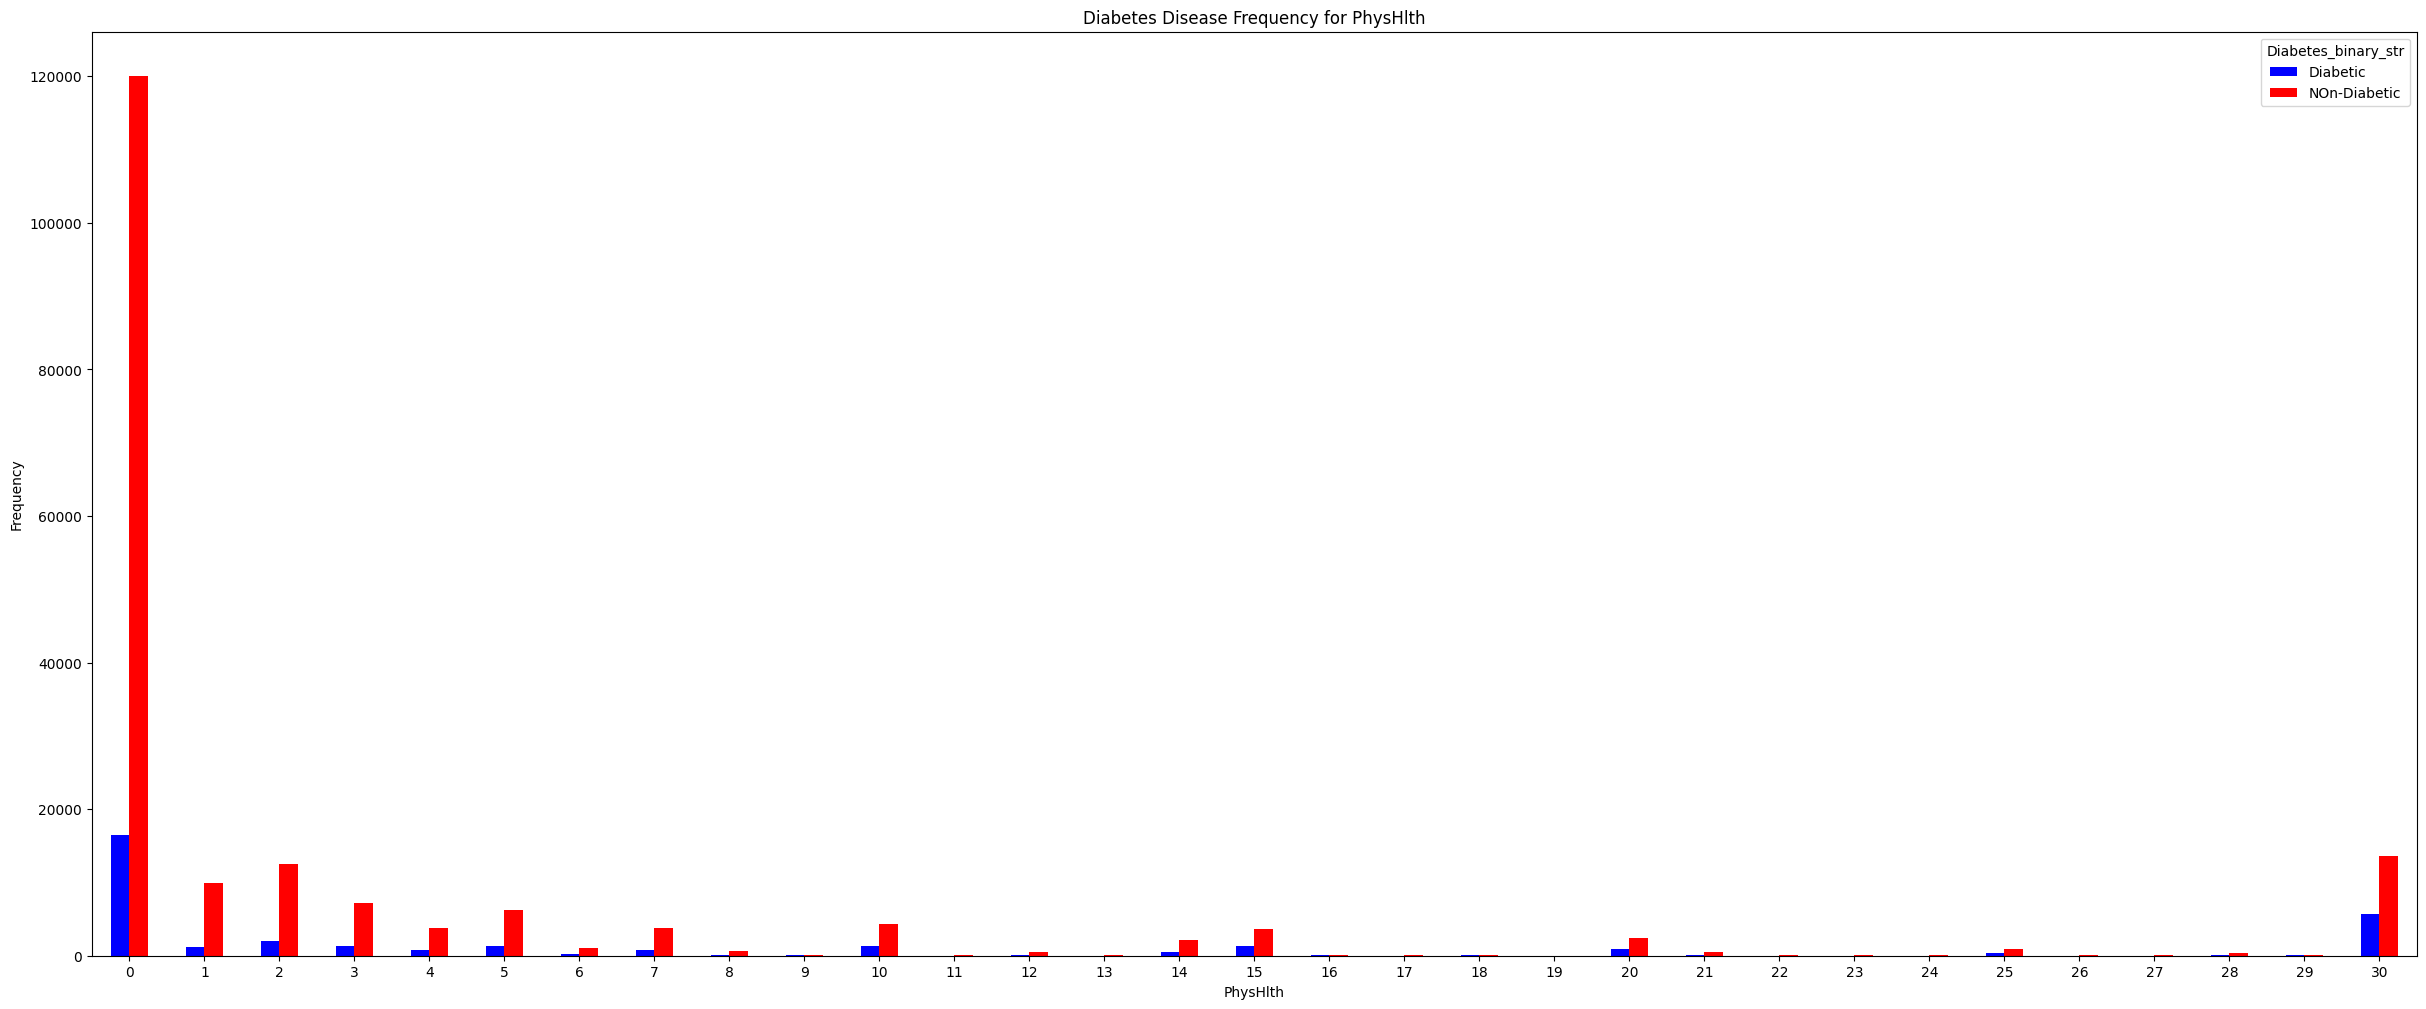

In [ ]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

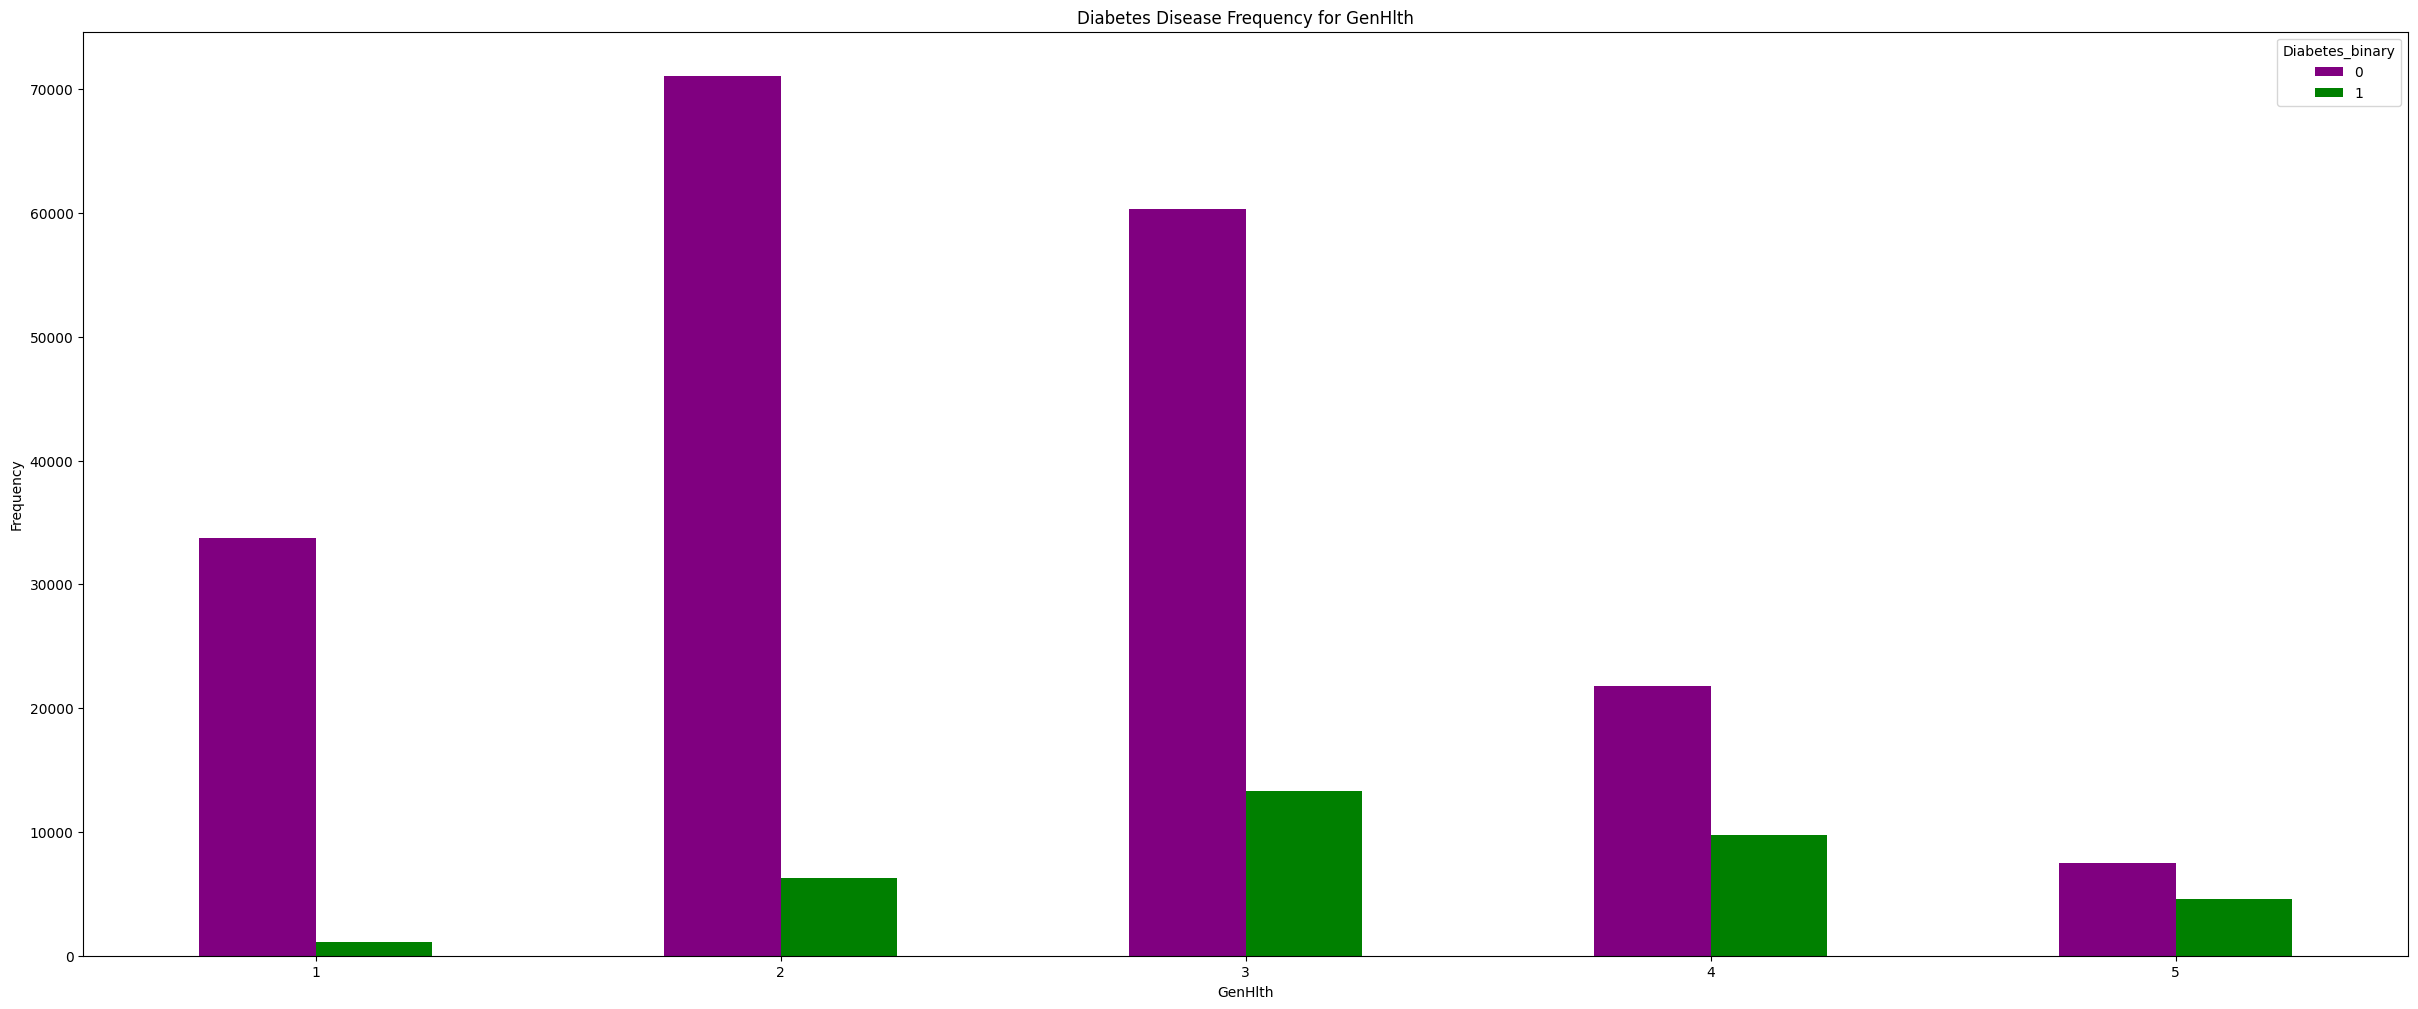

In [ ]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# 14: Seleção de Características
Realiza testes estatísticos para selecionar as melhores características para o modelo.

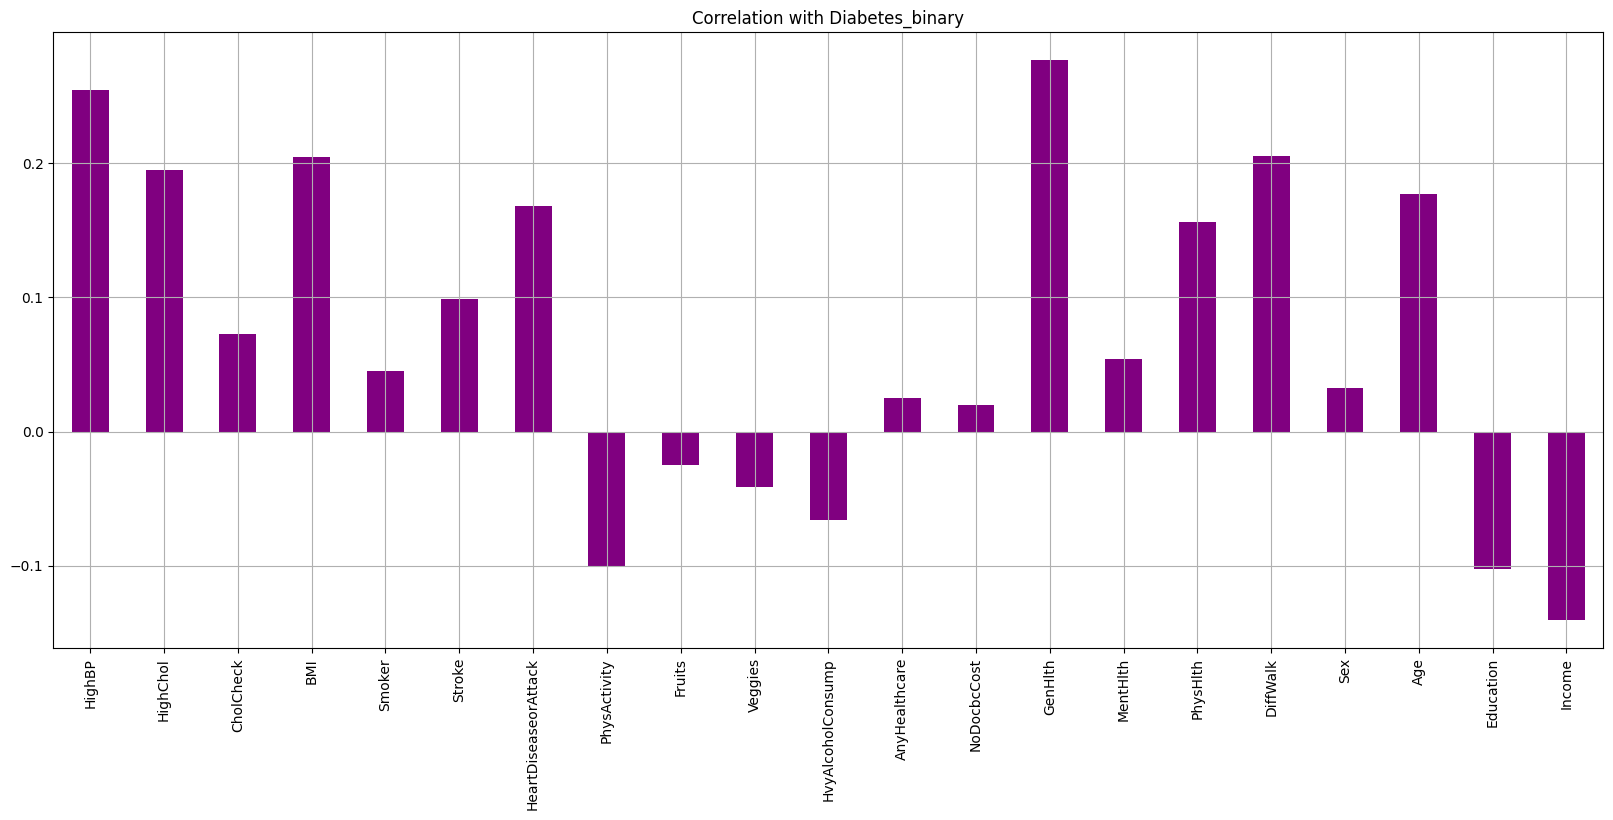

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

In [ ]:


def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


In [ ]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [ ]:
# Seleção de características ANOVA para entrada numérica e saída categórica
# Definir a seleção de características
fs = SelectKBest(score_func=f_classif, k=10)
# Aplicar a seleção de características
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [ ]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


In [ ]:
#Aplicar a classe SelectKBest para extrair as 10 melhores características.
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#Concatenando dois dataframes para uma melhor visualização.
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # Pontuações das características
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [ ]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [ ]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

#15: Divisão dos Dados
Divide o conjunto de dados em recursos (X) e variável alvo (Y), lidando com o desbalanceamento de classes usando a técnica NearMiss para undersampling e, em seguida, divide os dados em conjuntos de treinamento e teste.

In [ ]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [ ]:
Y.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [ ]:
y_sm.shape , x_sm.shape
y_sm.value_counts()

0    35097
1    35097
Name: Diabetes_binary, dtype: int64

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

#16: Padronização dos Dados
Padroniza os dados para garantir que todas as características tenham a mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# 17: Modelagem - Regressão Logística
Treina um modelo de Regressão Logística nos dados de treinamento e avalia seu desempenho no conjunto de teste. Exibe métricas de erro, como erro quadrático médio e matriz de confusão.

In [ ]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8512
Test set score: 0.8472


In [ ]:
# Verificar MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio)
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.152808775345458
Root Mean Squared Error : 0.3909076301960068


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



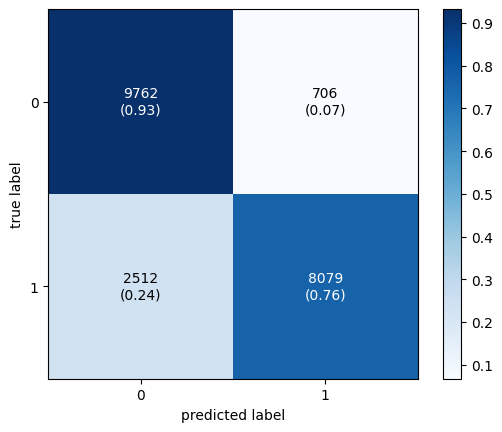

In [ ]:
# Calculando e plotando a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# 18: Modelagem - Árvore de Decisão
Semelhante à seção anterior, mas usando um modelo de Árvore de Decisão.

In [ ]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8657
Test set score: 0.8479


In [ ]:
# check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.15214397644712474
Root Mean Squared Error : 0.39005637598573456


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10468
           1       0.95      0.74      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059



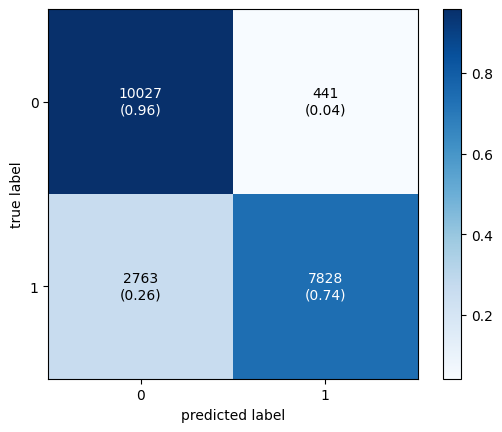

In [ ]:
# Calculando e plotando a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Modelagem - k-Vizinhos Mais Próximos (KNN)
Semelhante às seções anteriores, mas usando um modelo de k-Vizinhos Mais Próximos (KNN).

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# faz previsões no conjunto de teste
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8422
Test set score: 0.8049


In [ ]:
# calcula e exibe métricas de erro
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.19507099102521488
Root Mean Squared Error : 0.44166841750935154


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10468
           1       0.93      0.66      0.77     10591

    accuracy                           0.80     21059
   macro avg       0.83      0.81      0.80     21059
weighted avg       0.83      0.80      0.80     21059



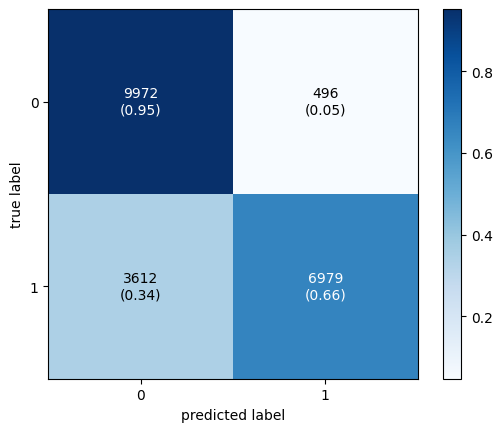

In [ ]:
# calcula e exibe a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# 20: Modelagem - Floresta Aleatória
Semelhante às seções anteriores, mas usando um modelo de Floresta Aleatória.

In [ ]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# ajusta o modelo nos dados de treinamento
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [ ]:
# faz previsões no conjunto de teste
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8713
Test set score: 0.8588


In [ ]:
# calcula e exibe métricas de erro
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14117479462462604
Root Mean Squared Error : 0.375732344395084


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10468
           1       0.94      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



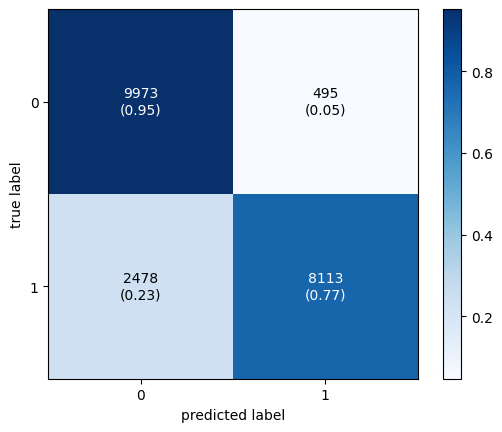

In [ ]:
# calcula e exibe a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# 21: Modelagem - Máquinas de Vetores de Suporte (SVM)
Semelhante às seções anteriores, mas usando um modelo de Máquinas de Vetores de Suporte (SVM).


In [ ]:
from sklearn.svm import SVC

# define o modelo
clf = SVC(kernel='rbf', C=1.0)

# treina o modelo
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8687
Test set score: 0.8603


In [ ]:
# calcula e exibe métricas de erro
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13970273992117385
Root Mean Squared Error : 0.37376829710553816


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



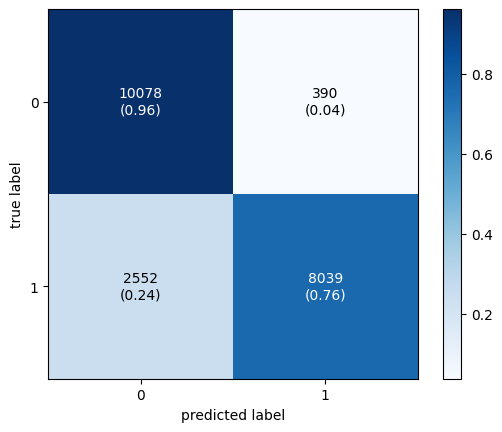

In [ ]:
# calcula e exibe a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#22: Modelagem - XGBoost
Esta seção usa o XGBoost para modelagem, faz previsões no conjunto de teste e avalia o desempenho do modelo.

In [ ]:
from xgboost import XGBClassifier
# define o modelo
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

# faz previsões no conjunto de teste
y_pred=xg.predict(X_test)
print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8769
Test set score: 0.8127


In [ ]:
# calcula e exibe métricas de erro
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.18728334678759676
Root Mean Squared Error : 0.4327624600027095


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10468
           1       0.85      0.76      0.80     10591

    accuracy                           0.81     21059
   macro avg       0.82      0.81      0.81     21059
weighted avg       0.82      0.81      0.81     21059



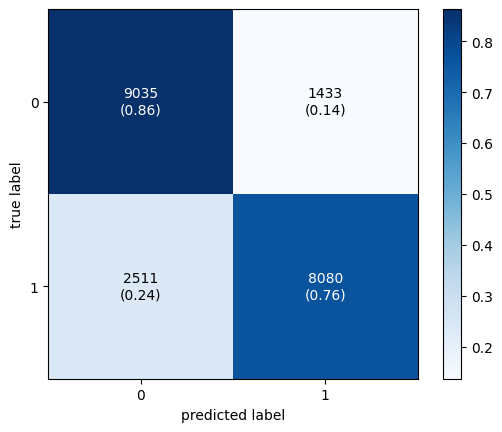

In [ ]:
# calcula e exibe a matriz de confusão
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()